In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
data=pd.read_csv("/content/gdrive/My Drive/Subscribers.csv")

Mounted at /content/gdrive


In [ ]:
import pandas as pd


In [ ]:
mydata = data


In [ ]:
# Data Processing

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')

In [ ]:
mydata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V42,V43,V44,V45,V46,V47,V48,V49,V50,Subscribers
0,-0.211875,743952.92,743952.92,200000.0,743952.92,200000.000,200000.0,-0.069396,943952.92,0.00,...,1.034232e+06,1966.57,1990.82,1752.89,100000.0,147.0,1826.046667,28.0,2557.22,0
1,0.241488,11295310.87,8034290.99,32000.0,8034290.99,18000.000,14000.0,0.167411,7508345.76,1160925.13,...,5.665658e+07,49957.65,11104.54,17711.99,38000.0,19.0,26467.683330,19.0,12807.07,0
2,0.459032,20363.68,317922.94,1650000.0,317922.94,1650000.000,1650000.0,46.068404,1655168.31,0.00,...,2.654720e+04,453.96,9.64,58.83,45072.0,0.0,315.506667,0.0,32.12,1
3,0.000000,856120.91,856120.91,0.0,856120.91,45554.885,0.0,0.000000,856120.91,0.00,...,8.506973e+05,2045.09,2045.09,2011.19,45072.0,30.0,2045.090000,19.0,2029.79,0
4,8.270783,194485.64,412330.33,835000.0,412330.33,835000.000,835000.0,-0.272225,2241.64,78625.00,...,5.572559e+04,70.01,100.60,89.59,31080.0,0.0,294.580000,0.0,26.95,0


In [ ]:
mydata.shape

(300000, 51)

In [ ]:
x = mydata.drop(columns=['Subscribers'],axis=1)
y = mydata['Subscribers']

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,-0.211875,743952.92,743952.92,200000.0,743952.92,200000.000,200000.0,-0.069396,943952.92,0.00,...,1,1.034232e+06,1966.57,1990.82,1752.89,100000.0,147.0,1826.046667,28.0,2557.22
1,0.241488,11295310.87,8034290.99,32000.0,8034290.99,18000.000,14000.0,0.167411,7508345.76,1160925.13,...,2,5.665658e+07,49957.65,11104.54,17711.99,38000.0,19.0,26467.683330,19.0,12807.07
2,0.459032,20363.68,317922.94,1650000.0,317922.94,1650000.000,1650000.0,46.068404,1655168.31,0.00,...,4,2.654720e+04,453.96,9.64,58.83,45072.0,0.0,315.506667,0.0,32.12
3,0.000000,856120.91,856120.91,0.0,856120.91,45554.885,0.0,0.000000,856120.91,0.00,...,0,8.506973e+05,2045.09,2045.09,2011.19,45072.0,30.0,2045.090000,19.0,2029.79
4,8.270783,194485.64,412330.33,835000.0,412330.33,835000.000,835000.0,-0.272225,2241.64,78625.00,...,5,5.572559e+04,70.01,100.60,89.59,31080.0,0.0,294.580000,0.0,26.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.335141,88883.08,93589.63,13500.0,93589.63,13500.000,0.0,-0.319523,100968.08,66000.00,...,0,2.525699e+07,442.29,580.88,730.08,95000.0,327.0,455.573333,217.0,840.18
299996,-0.685300,188409.84,150858.12,0.0,150858.12,45554.885,0.0,0.251368,89409.84,618700.00,...,0,3.840856e+05,899.20,792.45,530.60,400000.0,17.0,660.233333,17.0,612.61
299997,-0.011814,80169.18,81134.70,0.0,81134.70,45554.885,0.0,-0.565757,81169.18,0.00,...,0,8.067076e+04,8255.58,8515.33,8416.55,290434.0,87.0,8325.626667,61.0,8380.94
299998,0.000000,356125.94,356125.94,0.0,356125.94,45554.885,0.0,0.000000,356125.94,0.00,...,0,3.547008e+05,741.93,741.93,733.02,45072.0,240.0,741.930000,240.0,741.93


In [ ]:
y

0         0
1         0
2         1
3         0
4         0
         ..
299995    0
299996    0
299997    0
299998    0
299999    1
Name: Subscribers, Length: 300000, dtype: int64

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,random_state=2)

In [ ]:
scaler = StandardScaler().fit(x_train)

In [ ]:
sd_x_train = scaler.transform(x_train)
sd_x_test = scaler.transform(x_val)

In [ ]:
y_train.value_counts()

0    198601
1     41399
Name: Subscribers, dtype: int64

In [ ]:
cw = class_weight.compute_class_weight(class_weight='balanced',classes = np.unique(y_train),y = y_train)

In [ ]:
cw

array([0.60422656, 2.89862074])

In [ ]:
cw_dict =dict(enumerate(cw))

In [ ]:
cw_dict

{0: 0.6042265648209224, 1: 2.898620739631392}

# Sequential API

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2

In [ ]:
model_seq = Sequential()

model_seq.add(Dense(30,input_dim = 50,activation = 'relu',kernel_regularizer = L1(0.01),name = 'h1'))
model_seq.add(BatchNormalization(name = 'bn_h1'))
model_seq.add(Dropout(0.2,name = 'dr_h1'))

model_seq.add(Dense(20,input_dim = 30,activation = 'relu',kernel_regularizer = L1(0.01),name = 'h2'))
model_seq.add(BatchNormalization(name = 'bn_h2'))
model_seq.add(Dropout(0.2,name = 'dr_h2'))

model_seq.add(Dense(10,input_dim = 20,activation = 'relu',kernel_regularizer = L1(0.01),name = 'h3'))
model_seq.add(BatchNormalization(name = 'bn_h3'))
model_seq.add(Dropout(0.2,name = 'dr_h3'))

model_seq.add(Dense(1,input_dim = 10,activation = 'sigmoid',name = 'output'))


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
#plot_model(model = model_seq,show_shapes = True)

In [ ]:
model_seq.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics =['acc'])


In [ ]:
model_seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 30)                1530      
                                                                 
 bn_h1 (BatchNormalization)  (None, 30)                120       
                                                                 
 dr_h1 (Dropout)             (None, 30)                0         
                                                                 
 h2 (Dense)                  (None, 20)                620       
                                                                 
 bn_h2 (BatchNormalization)  (None, 20)                80        
                                                                 
 dr_h2 (Dropout)             (None, 20)                0         
                                                                 
 h3 (Dense)                  (None, 10)               

In [ ]:
model_seq.fit(sd_x_train,y_train,validation_data = (sd_x_test,y_val),class_weight = cw_dict,
              epochs = 1000,batch_size = 1000,verbose = 1)

Epoch 1/1000
240/240 [==============================] - 2s 6ms/step - loss: 0.5515 - acc: 0.8102 - val_loss: 0.4619 - val_acc: 0.8598
Epoch 2/1000
240/240 [==============================] - 2s 7ms/step - loss: 0.5515 - acc: 0.8101 - val_loss: 0.5059 - val_acc: 0.8291
Epoch 3/1000
240/240 [==============================] - 3s 11ms/step - loss: 0.5502 - acc: 0.8089 - val_loss: 0.5080 - val_acc: 0.8422
Epoch 4/1000
240/240 [==============================] - 1s 6ms/step - loss: 0.5503 - acc: 0.8103 - val_loss: 0.4967 - val_acc: 0.8347
Epoch 5/1000
240/240 [==============================] - 1s 6ms/step - loss: 0.5512 - acc: 0.8104 - val_loss: 0.5701 - val_acc: 0.7876
Epoch 6/1000
240/240 [==============================] - 1s 5ms/step - loss: 0.5491 - acc: 0.8109 - val_loss: 0.5362 - val_acc: 0.8174
Epoch 7/1000
240/240 [==============================] - 1s 5ms/step - loss: 0.5514 - acc: 0.8091 - val_loss: 0.4707 - val_acc: 0.8618
Epoch 8/1000
240/240 [==============================] - 1s 6m

# Functional API

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
x = Input(shape =(50,),name = 'input')
h1 = Dense(30,activation = 'relu',kernel_regularizer = L2(0.01),name ='h1')(x)
bn1 = BatchNormalization(name = 'bn_h1')(h1)
dr1 = Dropout(0.2,name = 'dr_h1')(bn1)

h2 = Dense(20,activation = 'relu',kernel_regularizer = L2(0.01),name ='h2')(dr1)
bn2 = BatchNormalization(name = 'bn_h2')(h2)
dr2 = Dropout(0.2,name = 'dr_h2')(bn2)

h3 = Dense(10,activation = 'relu',kernel_regularizer = L2(0.01),name ='h3')(dr2)
bn3 = BatchNormalization(name = 'bn_h3')(h3)
dr3 = Dropout(0.2,name = 'dr_h3')(bn3)

output = Dense(1,activation = 'sigmoid',name = 'output')(dr3)

In [ ]:
model_fn = Model(inputs = x,outputs = output)

In [ ]:
#plot_model(model = model_fn,show_shapes= True)

In [ ]:
model_fn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 50)]              0         
                                                                 
 h1 (Dense)                  (None, 30)                1530      
                                                                 
 bn_h1 (BatchNormalization)  (None, 30)                120       
                                                                 
 dr_h1 (Dropout)             (None, 30)                0         
                                                                 
 h2 (Dense)                  (None, 20)                620       
                                                                 
 bn_h2 (BatchNormalization)  (None, 20)                80        
                                                                 
 dr_h2 (Dropout)             (None, 20)                0     

#Keras Utility Functions : Callbacks

In [ ]:
# callback to get information in the time of training what is happening while learing like flag etc.
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,Callback
import os
from sklearn.metrics import roc_auc_score

In [ ]:
earlystop = EarlyStopping(monitor = 'loss',patience = 5)

In [ ]:
outputFolder = './Sub_model_output'
if not os.path.exists(outputFolder):
  os.makedirs(outputFolder)

In [ ]:
filepath = outputFolder + '/weights-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath = filepath,save_weights_only = True,monitor = 'val_loss',mode = 'min',save_best_only = False,save_freq = 50)

In [ ]:
class my_custom_callback(Callback):
  def __init__(self,features,target):
    self.test_data = (features,target)
    self.auc = []

  def on_epoch_end(self,epoch,logs = None):
    y_pred = self.model.predict(self.test_data[0])
    auc = roc_auc_score(self.test_data[1],y_pred)
    print(' \n auc score for val set :',auc,'\n')
    self.auc.append((epoch,auc))
    return

In [ ]:
mycallback = my_custom_callback(sd_x_test,y_val)

In [ ]:
model_fn.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics =['acc'])

In [ ]:
model_fn.fit(sd_x_train,y_train,validation_data = (sd_x_test,y_val),class_weight = cw_dict,
              epochs = 500,batch_size = 1000,verbose = 1,callbacks =[mycallback,earlystop,checkpoint])

Epoch 1/500
1875/1875 [==============================] - 3s 2ms/step
 
 auc score for val set : 0.7110685492488035 

240/240 [==============================] - 9s 31ms/step - loss: 1.1028 - acc: 0.5457 - val_loss: 0.8624 - val_acc: 0.5356
Epoch 2/500
1875/1875 [==============================] - 3s 2ms/step
 
 auc score for val set : 0.7997990435112127 

240/240 [==============================] - 7s 29ms/step - loss: 0.7003 - acc: 0.6970 - val_loss: 0.5708 - val_acc: 0.8496
Epoch 3/500
1875/1875 [==============================] - 4s 2ms/step
 
 auc score for val set : 0.8225554465812591 

240/240 [==============================] - 7s 29ms/step - loss: 0.5741 - acc: 0.7793 - val_loss: 0.4991 - val_acc: 0.8645
Epoch 4/500
1875/1875 [==============================] - 3s 2ms/step
 
 auc score for val set : 0.8262587984183755 

240/240 [==============================] - 7s 29ms/step - loss: 0.5401 - acc: 0.7946 - val_loss: 0.5119 - val_acc: 0.8501
Epoch 5/500
1875/1875 [=====================

In [ ]:
mycallback.auc

[(0, 0.7110685492488035),
 (1, 0.7997990435112127),
 (2, 0.8225554465812591),
 (3, 0.8262587984183755),
 (4, 0.8321262895433205),
 (5, 0.8375668694098123),
 (6, 0.829543546423458),
 (7, 0.8324684091744967),
 (8, 0.8354270525941135),
 (9, 0.8357952101067322),
 (10, 0.8356461306825073),
 (11, 0.8412127931334612),
 (12, 0.8388667159318675),
 (13, 0.8389752067789162),
 (14, 0.8412089891449289),
 (15, 0.8389455573552027),
 (16, 0.8384929511017926),
 (17, 0.8392041514015101),
 (18, 0.8399912292567646),
 (19, 0.8399413544148254),
 (20, 0.839605222109205),
 (21, 0.8405759503568828),
 (22, 0.8405926941584858),
 (23, 0.8406275152091355)]

<Axes: xlabel='epochs'>

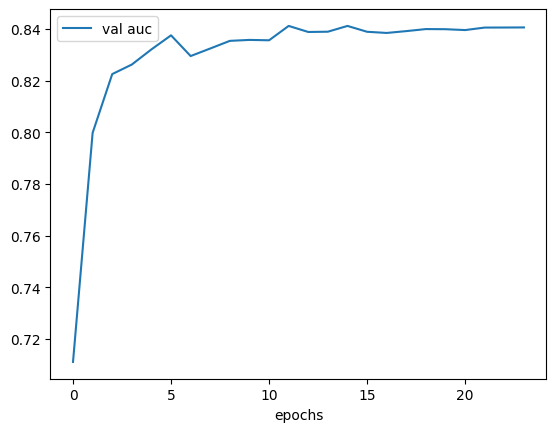

In [ ]:
pd.DataFrame(data = mycallback.auc,columns = ['epochs','val auc']).plot(
    x= 'epochs',y = 'val auc')

# Save Model

In [ ]:
import pickle
# SAVE THE ARCITETURE
model_json = model_fn.to_json()

In [ ]:
model_json

'{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 50], "dtype": "float32", "sparse": false, "ragged": false, "name": "input"}, "registered_name": null, "name": "input", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "h1", "trainable": true, "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": {"module": "keras.regularizers", "class_name": "L2", "config": {"l2": 0.009999999776482582}, "registered_name": null}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "regis

In [ ]:
#os.makedirs('./model_json_v0_json')

In [ ]:
with open( 'model_json_v0_json/model_json_v0.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
with open( 'model_json_v0_json/model_json_v0_scaler','wb') as sc:
  pickle.dump(scaler,sc)

# Load Model

In [ ]:
from tensorflow.keras.models import model_from_json


In [ ]:
# LOAD THE ACHITECTURE
json_file = open('./model_json_v0_json/model_json_v0.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# LOAD THE DESIRED WEIGHTS
loaded_model.load_weights('/content/Sub_model_output/weights-11-0.5162.h5')

In [ ]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 50)]              0         
                                                                 
 h1 (Dense)                  (None, 30)                1530      
                                                                 
 bn_h1 (BatchNormalization)  (None, 30)                120       
                                                                 
 dr_h1 (Dropout)             (None, 30)                0         
                                                                 
 h2 (Dense)                  (None, 20)                620       
                                                                 
 bn_h2 (BatchNormalization)  (None, 20)                80        
                                                                 
 dr_h2 (Dropout)             (None, 20)                0     

In [ ]:
sc = open( 'model_json_v0_json/model_json_v0_scaler','rb')

In [ ]:
scaler = pickle.load(sc)

In [ ]:
sc.close()

In [ ]:
loaded_model.predict(sd_x_test)

1875/1875 [==============================] - 5s 3ms/step


array([[0.33776203],
       [0.49281836],
       [0.4861902 ],
       ...,
       [0.9552909 ],
       [0.2595592 ],
       [0.32383576]], dtype=float32)

In [ ]:
roc_auc_score(y_val,loaded_model.predict(sd_x_test))

1875/1875 [==============================] - 5s 3ms/step


0.8337194368668377